In [52]:
#Importing libraries for data manipulation
import pandas as pd
import numpy as np

#Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Importing library for train and test split
from sklearn.model_selection import train_test_split

#Importing library for classification
from sklearn.ensemble import RandomForestClassifier

#Importing library for accuracy
from sklearn.metrics import accuracy_score

#Importing libraries for feature selection
from sklearn.feature_selection import VarianceThreshold, f_classif, f_regression, SelectKBest, SelectPercentile

In [53]:
#Enabling the full view of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [54]:
#Loading data
train = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/Data-Files-for-Feature-Selection/master/santander-train.csv', nrows = 1000)

In [55]:
#Checking the data
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [56]:
#Splitting data into X & y
X = train.drop(columns = 'TARGET', axis =1)
y = train['TARGET']

#Checking the shape of the data
print(X.shape, y.shape)

(1000, 370) (1000,)


In [57]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = y)

#Checking the shape of the data
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((800, 370), (800,), (200, 370), (200,))

We have 370 features from which We will remove constant, quasi constant and duplicate features first

#Removing constant & quasi constant features

In [73]:
#Creating constant filter
constant_filter = VarianceThreshold(threshold=0.01)

#Fitting data into constant filter
constant_filter.fit(X_train)

#Checking non-constant filter
print('Non-constant features count extract:',constant_filter.get_support().sum())

#Extracting non constant features
non_constant_features = X_train.columns[constant_filter.get_support()]
print('Non-constant features count verify:',len(non_constant_features))

#Removing constant variables from the data
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

#Converting numpy array into dataframe
X_train_filter_df = pd.DataFrame(X_train_filter, columns=non_constant_features)
X_test_filter_df = pd.DataFrame(X_test_filter, columns=non_constant_features)

#Checking the shape of the data
X_train_filter_df.shape,y_train.shape, X_test_filter_df.shape, y_test.shape

Non-constant features count extract: 234
Non-constant features count verify: 234


((800, 234), (800,), (200, 234), (200,))

#Removing duplicate features

In [88]:
#Transposing the data
X_train_T_df = X_train_filter_df.T
X_test_T_df = X_test_filter_df.T

#Extracting list duplicate features
extract_duplicate = X_train_T_df.duplicated()
print('Extracted duplicate features:',len(extract_duplicate.values[extract_duplicate.values==True]))
print('Extracted non duplicate features:',len(extract_duplicate.values[~extract_duplicate.values==True]))

#Transposing data
X_train_NT_df = X_train_T_df.T
X_test_NT_df = X_test_T_df.T

#Extracting duplicate and non duplicate features name from the list duplicate features
duplicate_features = X_train_NT_df.columns[extract_duplicate.values]
non_duplicate_features = X_test_NT_df.columns[~extract_duplicate.values]
print('Verify duplicate features:',len(duplicate_features))
print('Verify non duplicate features:',len(non_duplicate_features))

#Removing duplicate features from the data
X_train_unique_df = X_train_NT_df[non_duplicate_features]
X_test_unique_df = X_test_NT_df[non_duplicate_features]

#Checking the shape of the data
X_train_unique_df.shape, y_train.shape, X_test_unique_df.shape, y_test.shape

Extracted duplicate features: 33
Extracted non duplicate features: 201
Verify duplicate features: 33
Verify non duplicate features: 201


((800, 201), (800,), (200, 201), (200,))

In [89]:
#Checking the data
X_train_unique_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13,ind_var14_0,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var25_0,ind_var30,ind_var37_cte,ind_var37_0,ind_var39_0,ind_var41_0,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13,num_var14_0,num_var14,num_var17_0,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var25_0,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var30_0,num_var30,num_var31_0,num_var32_0,num_var35,num_var37_med_ult2,num_var37_0,num_var39_0,num_var41_0,num_var42_0,num_var42,num_var44_0,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13,saldo_var14,saldo_var17,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var30,saldo_var31,saldo_var32,saldo_var37,saldo_var42,saldo_var44,var36,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_venta_var44_1y3,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_venta_var44_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_meses_var13_largo_ult3,num_meses_var17_ult3,num_meses_var39_vig_ult3,num_meses_var44_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var40_comer_ult1,num_op_var40_comer_ult3,num_op_var40_efect_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult3,num_reemb_var13_ult1,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var17_hace2,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_ult1,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1210.0,2.0,24.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,99.0,0.0,0.0,0.0,0.0,0.00000

We have removed constant, quasi constant and duplicate features

#Feature Selection through F-Test

In [121]:
#Implementing F-Test on the data
sel = f_classif(X_train_unique_df, y_train)

#Checking Test result
sel

(array([2.17711223e-01, 4.15686935e-02, 1.63716713e+01, 1.96776057e-01,
        5.21389605e-01, 8.32816405e-02, 1.89221732e-01, 2.82435528e-03,
        4.16166884e-02, 1.16763605e-01, 4.50642302e-01, 8.66569077e-02,
        1.55142042e-01, 2.36677900e-04, 4.75037833e-01, 7.80228034e-04,
        5.29342220e-01, 4.16166884e-02, 1.19746776e+00, 5.02149974e-02,
        8.46643412e+00, 3.25216505e-02, 8.06739680e-02, 2.31821229e+00,
        1.47858311e+00, 3.31094891e-01, 1.46305542e-01, 1.03424937e-01,
        2.73624431e-01, 7.66080000e-01, 1.25261164e+00, 1.20778378e+00,
        3.65784639e-01, 4.68264059e-01, 2.82477876e-01, 5.94695182e-01,
        1.27661350e+01, 6.11272521e-01, 8.81767956e-01, 6.23579198e-01,
        5.17393318e-01, 1.19746776e+00, 2.52755429e+00, 1.74891576e+00,
        2.08151288e-02, 8.46643412e+00, 4.16166884e-02, 3.25216505e-02,
        8.06739680e-02, 2.27392863e+00, 1.47858311e+00, 3.31094891e-01,
        1.46305542e-01, 1.03424937e-01, 2.93613666e-01, 2.736244

In [106]:
#Extracting p_value from the result
p_values = pd.DataFrame()
p_values['Features'] = X_train_unique_df.columns
p_values['P_values'] = sel[1]
p_values.sort_values(by='P_values',ascending=False, inplace = True)
p_values.reset_index(drop=True)

,Features,P_values
0,num_op_var40_comer_ult1,0.989308
1,imp_op_var41_efect_ult3,0.987729
2,num_var37_0,0.983880
3,imp_op_var39_efect_ult3,0.977723
4,num_op_var40_ult3,0.977154
5,saldo_var37,0.971237
6,imp_op_var40_comer_ult3,0.957630
7,num_op_var40_ult1,0.955603
8,num_meses_var39_vig_ult3,0.938914
9,num_op_var40_comer_ult3,0.936272


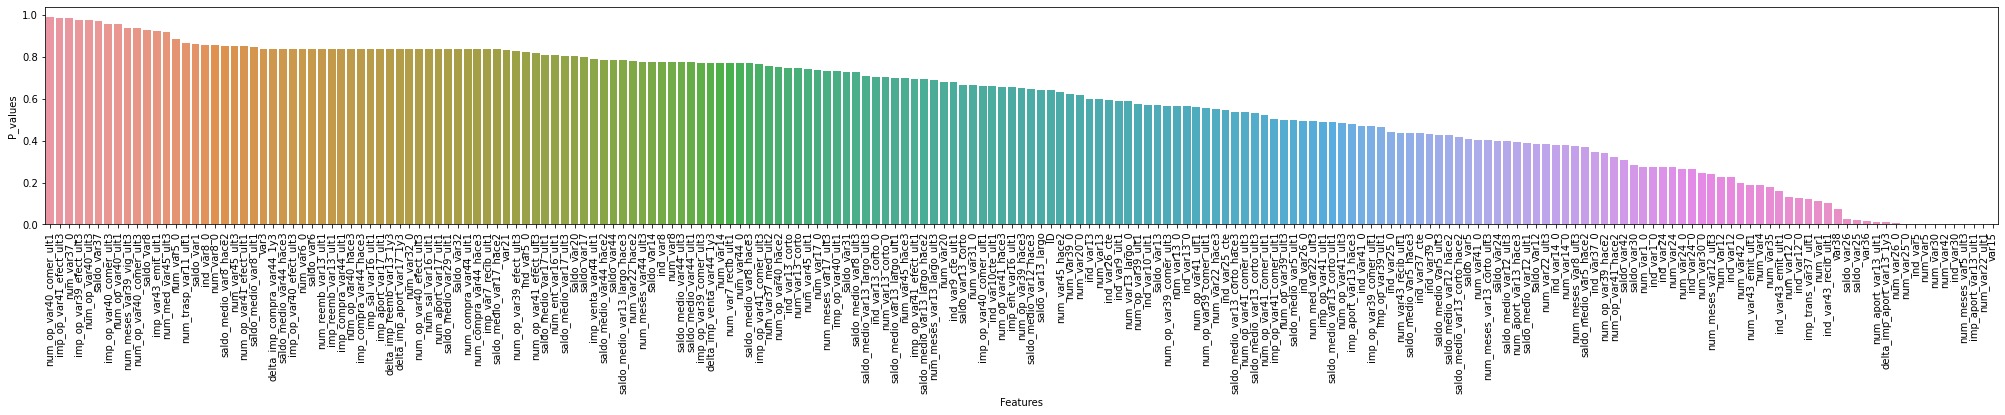

In [108]:
#Visualizing the p_values
plt.figure(figsize=(35,4))
sns.barplot(x=p_values['Features'], y=p_values['P_values']);
plt.xticks(rotation=90);

In [109]:
#Extracting the p values greater than 0.05
p_values_grt = p_values[p_values['P_values']>0.05]

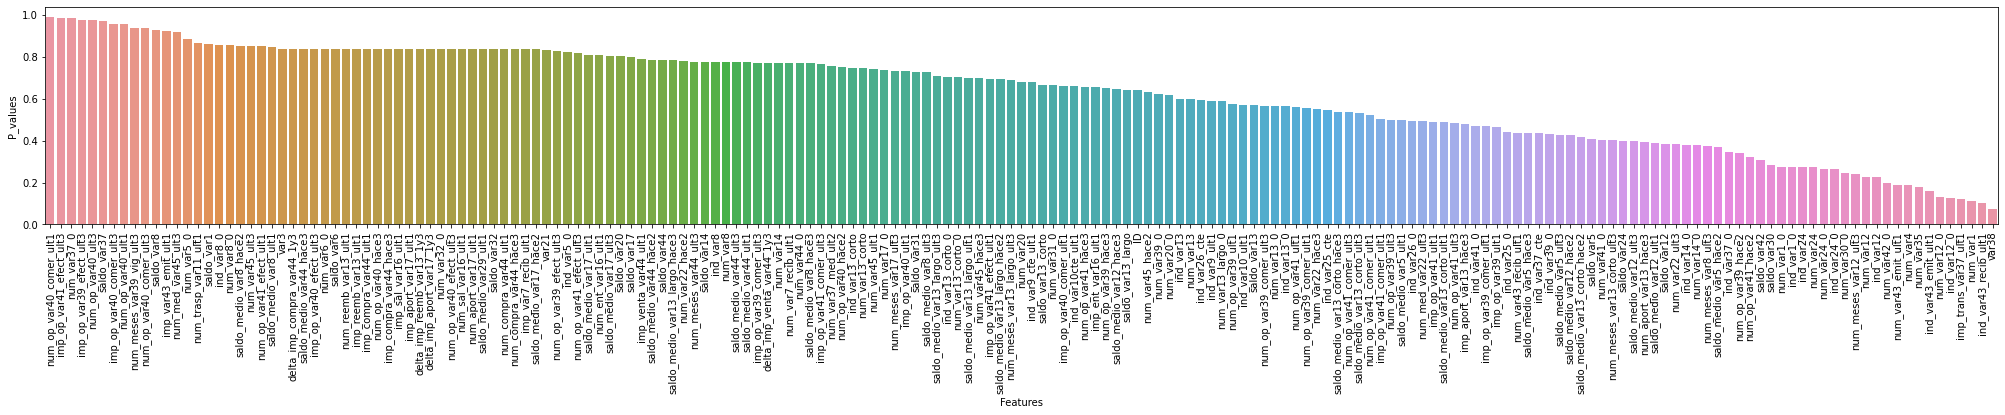

In [110]:
#Visualizing the p_values
plt.figure(figsize=(35,4))
sns.barplot(x=p_values_grt['Features'], y=p_values_grt['P_values']);
plt.xticks(rotation=90);

In [119]:
#Extracting the variables have p value less than 0.05
features_less_p_threshold = p_values[p_values['P_values']<0.05]['Features'].values
features_grt_p_threshold = p_values[p_values['P_values']>0.05]['Features'].values

In [117]:
#Checking the count of variables have p value less than 0.05
len(features_less_p_threshold)

16

In [120]:
#Removing features from the data
X_train_p = X_train_unique_df[features_grt_p_threshold]
X_test_p = X_test_unique_df[features_grt_p_threshold]

#Checking shape of the data
X_train_p.shape, X_test_p.shape

((800, 185), (200, 185))

In [122]:
#Creating model
def rf_classifier(X_train, X_test, y_train, y_test):
  rf = RandomForestClassifier(n_estimators=100, random_state=0)
  rf.fit(X_train_p, y_train)
  y_pred = rf.predict(X_test_p)
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)

In [124]:
%%time
#Extracting accuracy from p_data
rf_classifier(X_train_p, X_test_p, y_train, y_test)

0.96
CPU times: user 233 ms, sys: 0 ns, total: 233 ms
Wall time: 240 ms


In [125]:
%%time
#Extracting accuracy from original data
rf_classifier(X_train, X_test, y_train, y_test)

0.96
CPU times: user 252 ms, sys: 1.68 ms, total: 253 ms
Wall time: 255 ms
